# KNN Regression and Classification

## 1. K Nearest Neighbor Classification

In [1]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames

* MNIST database (Modified National Institute of Standards and Technology database)
* Digits written by high school students and employees of the United States Census Bureau
* The MNIST database contains 60,000 training images and 10,000 testing images
* A sample of 5,000 training images and 1,000 testing images are taken

    <img src="mnist.png">

In [2]:
train = pd.read_csv('./train_sample.csv')
test = pd.read_csv('test_sample.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [5]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

print(X_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


Let us display a sample of 12 numbers from train data and visualize them

In [6]:
s = np.random.choice(range(X_train.shape[0]), size=12)
list(enumerate(s))

[(0, 1456),
 (1, 1240),
 (2, 2648),
 (3, 142),
 (4, 1771),
 (5, 3353),
 (6, 3971),
 (7, 1907),
 (8, 709),
 (9, 1662),
 (10, 4388),
 (11, 110)]

## Plot the data

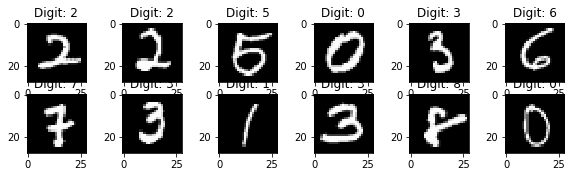

In [7]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

plt.figure(figsize=(10,5)) #Width and heigth of the image displayed below (Optional)

for i,j in enumerate(s):
    plt.subplot(4,6,i+1)                                      # Subplot flag
    plt.imshow(np.array(X_train.loc[j]).reshape(28,28))      # Plot the image
    plt.title('Digit: '+str(y_train.loc[j]))                 # Target of the image
    plt.gray()                                                # For gray scale images 

## Classification

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute', n_neighbors=5, p=2, weights='distance')
# 'brute' for searching through all the samples
# p=2 for Euclidean; p=1 for Mannhatten Distance
# Check the help file for all the arguments

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

## Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

pred_train = knn.predict(X_train) 
cm_test = confusion_matrix(y_true=y_train, y_pred=pred_train)
print(cm_test)

[[500   0   0   0   0   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0   0 500   0   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0   0 500   0   0   0   0   0]
 [  0   0   0   0   0 500   0   0   0   0]
 [  0   0   0   0   0   0 500   0   0   0]
 [  0   0   0   0   0   0   0 500   0   0]
 [  0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 500]]


In [10]:
#pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'])

In [11]:
pred_test = knn.predict(X_test) 
cm_test = confusion_matrix(y_true=y_test, y_pred=pred_test)
print(cm_test)

[[ 97   0   0   0   0   0   3   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   3  95   0   0   0   0   1   0   1]
 [  1   0   1  88   0   5   0   1   2   2]
 [  0   2   0   0  92   0   0   0   0   6]
 [  0   1   0   3   0  94   2   0   0   0]
 [  0   0   0   0   0   3  97   0   0   0]
 [  0   3   0   0   0   0   0  95   0   2]
 [  0   1   1   2   0   6   0   1  88   1]
 [  0   0   0   0   0   0   0   3   0  97]]


In [12]:
#pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'])

## Accuracy

In [13]:
acc_test = float(np.trace(cm_test))/np.sum(cm_test)
print(acc_test)

0.943


# K Nearest Neighbors

In [20]:
#r = 0
r = np.random.choice(X_test.shape[0],1)    # Uncomment this to set a random query
print(r)

query = X_test.iloc[r].values
#print(query)

[118]


In [21]:
nn=5                        # Number of search results
out = knn.kneighbors(n_neighbors=nn, return_distance=True, X=query)  # Print 'out' and Check the object type
print(out)
#print(type(out))
#out(knn.kneighbors) is a tuple. You will get an error if you run this cell for 2nd time

(array([[685.70183024, 690.55195315, 718.15527569, 749.07943504,
        768.14907407]]), array([[676, 772, 771, 928, 754]]))


In [24]:
distances = out[0]          # Distance of each retrieved sample
results = out[1][0]            # Retrieved sample index
print(distances)         
print(results)

[[685.70183024 690.55195315 718.15527569 749.07943504 768.14907407]]
[676 772 771 928 754]


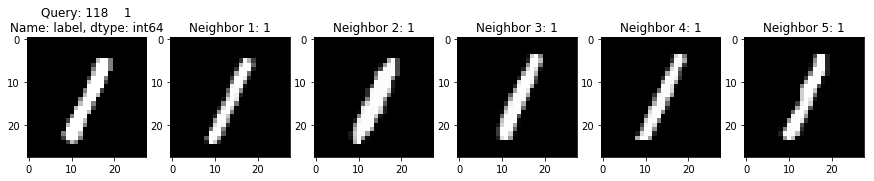

In [25]:
# Plot Qeury Vs Search Results
plt.figure(figsize=(15,5))
plt.subplot(1,nn+1,1)
plt.imshow(np.array(query).reshape(28,28))
plt.title('Query: '+str(y_test.iloc[r]))
plt.gray()

for i,j in enumerate(results):
    plt.subplot(1,nn+1,i+2)
    plt.imshow(np.array(X_train.iloc[j]).reshape(28,28))
    plt.title('Neighbor '+str(i+1)+': '+str(y_train.iloc[j]))
    plt.gray()

## 2. KNN Regression

In [32]:
## Randomly Generate some Data
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [51]:
#Generate 1000 rows and 4 columns randomly -- size=(1000,4)
#Each value ranges between 2 and 100
#The column names are T, A, B, C (T is target)

data  = pd.DataFrame(np.random.randint(2,100,size=(10000, 4)), columns=list('TABC'))

In [52]:
#Activity1: #Find the Dimesnions of Dataframe



In [53]:
#Activity2: #Display first 5 rows



In [54]:
#Activity3: #Display last 10 rows

#data

In [55]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2) #80-20 ratio train test split
print(train.shape, test.shape)

(8000, 4) (2000, 4)


In [56]:
#Store train target as Y_train
Y_train = train["T"]

In [57]:
#Store test target as y_test
y_test = test["T"]

In [58]:
#Normalize the data (x-min(x))/(max(x)-min(x))
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#Standardize the data (x-mean(x))/std(x)
#scaler = preprocessing.StandardScaler()

scaler.fit(train.iloc[:,1:])

stdtrain = pd.DataFrame(scaler.transform(train.iloc[:,1:]), columns=list("abc"))
stdtest = pd.DataFrame(scaler.transform(test.iloc[:,1:]), columns=list("abc"))

In [59]:
print(stdtrain.head(5))
print(stdtest.head(5))

          a         b         c
0  0.185567  0.381443  0.804124
1  0.938144  0.762887  0.453608
2  0.010309  0.474227  0.659794
3  0.185567  0.835052  0.711340
4  0.845361  0.185567  0.979381
          a         b         c
0  0.948454  0.237113  0.226804
1  0.670103  0.422680  0.701031
2  0.690722  0.020619  0.000000
3  0.597938  0.329897  0.639175
4  0.701031  0.752577  0.628866


In [60]:
#X_train = stdtrain.iloc[:,1:]
#y_train = stdtrain.iloc[:,0]
print(stdtrain.shape)
print(Y_train.shape)

(8000, 3)
(8000,)


In [61]:
stdtrain.head(5)

,a,b,c
0,0.185567,0.381443,0.804124
1,0.938144,0.762887,0.453608
2,0.010309,0.474227,0.659794
3,0.185567,0.835052,0.711340
4,0.845361,0.185567,0.979381


In [62]:
#X_test = stdtest.iloc[:,1:]
#y_test = stdtest.iloc[:,0]

print(stdtest.shape)
print(y_test.shape)

(2000, 3)
(2000,)


In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(stdtrain, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [64]:
predictions = knn.predict(stdtest)

In [65]:
#Activity 4: Function to calculate mse


In [66]:
#mse(predictions,y_test)

In [67]:
#to call inbuilt error metrics from sklearn
from sklearn import metrics

In [68]:
metrics.mean_squared_error(predictions, y_test)

974.7858400000001